In [18]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.5);

In [19]:
glass_filepath = Path('.', 'data', 'glass.csv')
glass = pd.read_csv(glass_filepath)
glass.head()
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']

In [20]:
from sklearn.linear_model import LinearRegression

feature_cols = ['al']
X = glass.loc[:, feature_cols]
y = glass.loc[:, 'ri']

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

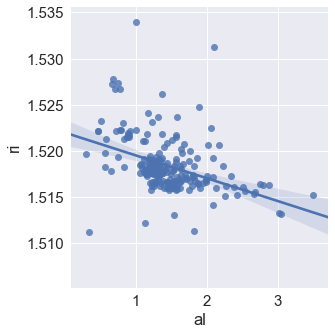

In [21]:
#scatter with regression line
sns.lmplot(data=glass, x='al', y='ri')

In [22]:

from sklearn.linear_model import LinearRegression

feature_cols = ['al']
X = glass.loc[:, feature_cols]
y = glass.loc[:, 'ri']

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
glass.loc[:, 'predictions'] = linreg.predict(X)

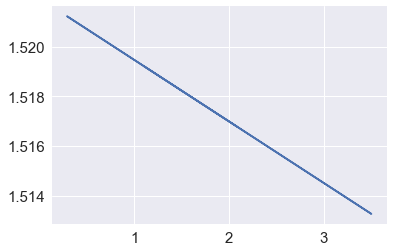

In [24]:
plt.plot(glass.loc[:,'al'], glass.loc[:,'predictions'])

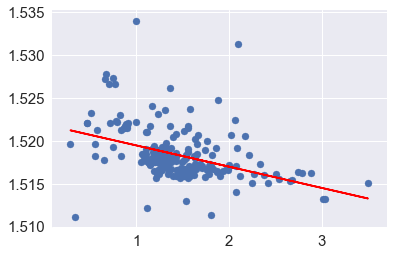

In [25]:
# Put the plots together (use a scatter and line graph).
#use plt to plot bot the predicted line, and the scatter plot of al vs ri

plt.plot(glass.loc[:,'al'], glass.loc[:, 'predictions'], color='red')
plt.scatter(glass.loc[:, 'al'], glass.loc[:, 'ri']);

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

null_pred = np.ones(y.shape)
null_pred *= y.mean()

null_rmse = (mean_squared_error(y, null_pred))**(0.5)
pred_rmse = (mean_squared_error(y, glass.loc[:, 'predictions']))**(0.5)

print(null_rmse)
print(pred_rmse)
print((pred_rmse - null_rmse) / null_rmse)

0.00302975995483
0.00276702770328
-0.0867171840226


In [27]:
glass.loc[:, 'glass_type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

In [28]:
# Logistic Regression can only answer Yes/No Questions
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
# 1 for yes, 0 for no

glass.loc[:, 'household'] = glass.loc[:, 'glass_type'].map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.loc[:, 'household'].value_counts()

0    163
1     51
Name: household, dtype: int64

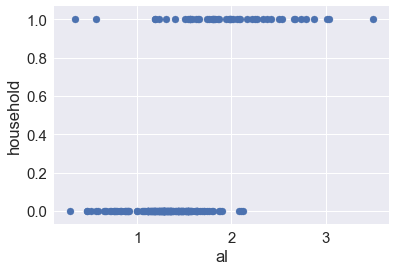

In [29]:
plt.scatter(glass.loc[:, 'al'], glass.loc[:, 'household'])
plt.xlabel('al')
plt.ylabel('household');



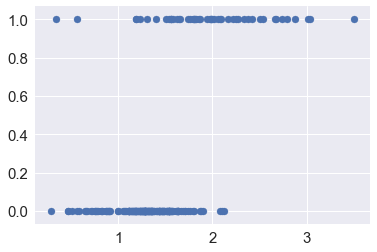

In [30]:
plt.scatter(glass.loc[:, 'al'], glass.loc[:, 'household'])

In [31]:
feature_cols = ['al']
X = glass.loc[:, feature_cols] 
y = glass.loc[:, 'household']

linreg = LinearRegression()
linreg.fit(X,y)

glass.loc[:, 'household_pred'] = linreg.predict(X)

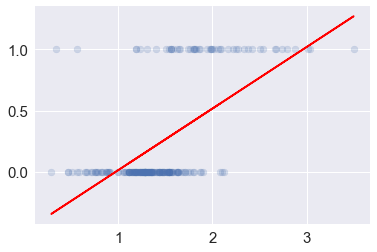

In [33]:
plt.scatter(glass.loc[:, 'al'], glass.loc[:, 'household'], alpha=.2)
plt.plot(glass.loc[:, 'al'], glass.loc[:, 'household_pred'], color='red')

In [34]:
import numpy as np
nums = np.array([5, 15, 8])
np.where(nums>10, 'BIG', 'small')

array(['small', 'BIG', 'small'],
      dtype='<U5')

In [35]:
#use np.where function

glass.loc[:, 'household_pred_class'] = np.where(glass.loc[:, 'household_pred'] >= 0.5, 1, 0)

In [36]:
glass.tail()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,predictions,household,household_pred,household_pred_class
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7,1.514810,1,0.957554,1
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7,1.517015,1,0.511506,1
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7,1.516941,1,0.526541,1
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7,1.517139,1,0.486447,0
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7,1.516792,1,0.556612,1


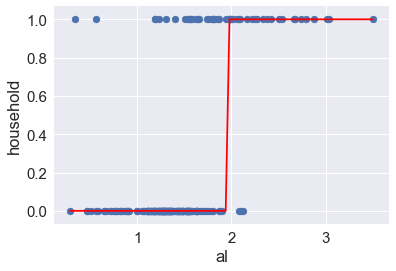

In [37]:
glass.sort_values('al', inplace=True)
plt.scatter(glass.loc[:, 'al'], glass.loc[:, 'household'])
plt.xlabel('al')
plt.ylabel('household')

glass.sort_values('al', inplace=True)
plt.plot(glass.loc[:, 'al'], glass.loc[:, 'household_pred_class'], color='red')

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()



In [40]:
feature_cols = ['al']
X = glass.loc[:, feature_cols]
y = glass.loc[:, 'household']

logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
glass.loc[:, 'household_pred_logreg'] = logreg.predict(X)

In [42]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,predictions,household,household_pred,household_pred_class,household_pred_logreg
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0


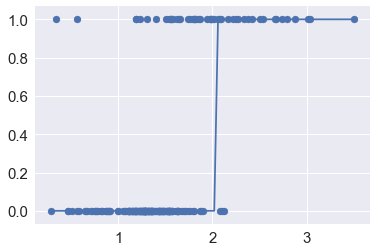

In [45]:
plt.scatter(glass.loc[:, 'al'], glass.loc[:, 'household'])
plt.plot(glass.loc[:, 'al'], glass.loc[:, 'household_pred_logreg'])

In [47]:
logreg.predict_proba(X)

array([[ 0.97193375,  0.02806625],
       [ 0.96905681,  0.03094319],
       [ 0.96017962,  0.03982038],
       [ 0.96017962,  0.03982038],
       [ 0.9569876 ,  0.0430124 ],
       [ 0.95265323,  0.04734677],
       [ 0.95265323,  0.04734677],
       [ 0.95080573,  0.04919427],
       [ 0.94378757,  0.05621243],
       [ 0.94271112,  0.05728888],
       [ 0.94161533,  0.05838467],
       [ 0.93703277,  0.06296723],
       [ 0.93583576,  0.06416424],
       [ 0.93211646,  0.06788354],
       [ 0.93211646,  0.06788354],
       [ 0.92952688,  0.07047312],
       [ 0.92819811,  0.07180189],
       [ 0.92684626,  0.07315374],
       [ 0.92264896,  0.07735104],
       [ 0.9212015 ,  0.0787985 ],
       [ 0.9212015 ,  0.0787985 ],
       [ 0.91516104,  0.08483896],
       [ 0.91516104,  0.08483896],
       [ 0.91358659,  0.08641341],
       [ 0.91198573,  0.08801427],
       [ 0.91035812,  0.08964188],
       [ 0.91035812,  0.08964188],
       [ 0.90870343,  0.09129657],
       [ 0.89253652,

In [48]:
glass.loc[:, 'household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [49]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,predictions,household,household_pred,household_pred_class,household_pred_logreg,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0,0.028066
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0,0.030943
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0,0.039820
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0,0.039820
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0,0.043012


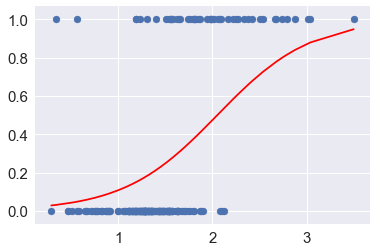

In [52]:
plt.scatter(glass.loc[:, 'al'], glass.loc[:, 'household'])
plt.plot(glass.loc[:, 'al'], glass.loc[:, 'household_pred_prob'], color='red')

In [54]:
print(logreg.predict_proba(1))

[[ 0.89253652  0.10746348]]


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['na', 'mg']
X = glass.loc[:, feature_cols]
y = glass.loc[:, 'household']

X_train, X_test, y_train, y_test = train_test_split(X,y)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_logpred_red_namg = logreg.predict(X_test)
#glass.loc[:, 'household_pred_logreg'] = logreg.predict(X)

In [56]:
y_pred_logpred_red_namg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
print(metrics.accuracy_score(y_test, y_pred_logpred_red_namg))
print(logreg.score(X_test, y_test))

0.944444444444
0.944444444444


In [59]:
table = pd.DataFrame({'probability':[0.25, 1/3, 2/3, .95]})
table['odds'] = table.probability / (1 - table.probability)

table['logodds'] = np.log(table['odds'])
table

,probability,odds,logodds
0,0.250000,0.333333,-1.098612
1,0.333333,0.500000,-0.693147
2,0.666667,2.000000,0.693147
3,0.950000,19.000000,2.944439


In [60]:
from sklearn import linear_model, metrics, model_selection

admissions_path = Path('.', 'data', 'admissions.csv')
admissions = pd.read_csv(admissions_path).dropna()
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [61]:
from sklearn import linear_model, metrics, model_selection

admissions_path = Path('.', 'data', 'admissions.csv')
admissions = pd.read_csv(admissions_path).dropna()
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

feature_cols = ['gre']
X = admissions.loc[:, feature_cols]
y = admissions.loc[:, 'admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46)

logit_simple = LogisticRegression()
logit_simple.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
logit_simple.score(X_test, y_test)

0.64000000000000001

In [81]:
import numpy as np
# Compare to null model
# chose 0 zero because our null model says no everytime
# y.mean() - 32% people were admitted, so more likely NOT ADMITTED
y_pred_null = np.zeros(y_test.shape)
y_pred_null

# meaning - There's no predictive power to just saying No Everytime
metrics.accuracy_score(y_test, y_pred_null)

0.64000000000000001

In [68]:
y_test.mean()

0.36

In [72]:
#confusion matrix
logit_pred_proba = logit_simple.predict_proba(X_test)[:, 1]
y_pred = logit_pred_proba >.5
metrics.confusion_matrix(y_test, y_pred)

array([[64,  0],
       [36,  0]])

In [73]:
#confusion matrix around 0.3 (about 32% people admitted)
y_pred =  logit_pred_proba > .3
metrics.confusion_matrix(y_test, y_pred)

array([[25, 39],
       [ 9, 27]])

In [76]:
logit_simple

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
y_train.mean()

0.30303030303030304